## IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')   

## DATA PREPARATION

LOAD DATASET

In [2]:
df = pd.read_csv(r"C:\Users\pavan\Desktop\FSDS\PROJECTS\avocado-eda-dashboard-main\avocado.csv")


In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EXPLORE THE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## MISSING VALUE CHECKING

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# DROPPING UNNECESSARY COLUMNS

In [7]:
df.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


ANSWERING QUESTIONS

In [8]:
def get_avarage(df,column):
    """
    Description: This function to return the average value of the column 

    Arguments:
        df: the DataFrame. 
        column: the selected column. 
    Returns:
        column's average 
    """
    return sum(df[column])/len(df)

In [9]:
def get_avarge_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame. 
        column1:the first column. 
        column2:the scond column.
    Returns:
        Sorted data for relation between column1 and column2
    """
    
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})

In [10]:
import matplotlib.pyplot as plt

def plot(data, x_label, y_label):
    plt.figure(figsize=(10,5))
    plt.bar(data.iloc[:, 0], data.iloc[:, 1])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.title(f"{y_label} by {x_label}")
    plt.tight_layout()
    plt.show()


In [11]:
def get_average_between_two_columns(df, group_col, value_col):
    """
    Returns a DataFrame with the average of value_col grouped by group_col
    """
    return (
        df.groupby(group_col)[value_col]
          .mean()
          .reset_index()
    )


 Which region has the highest and lowest price of the Avocado?

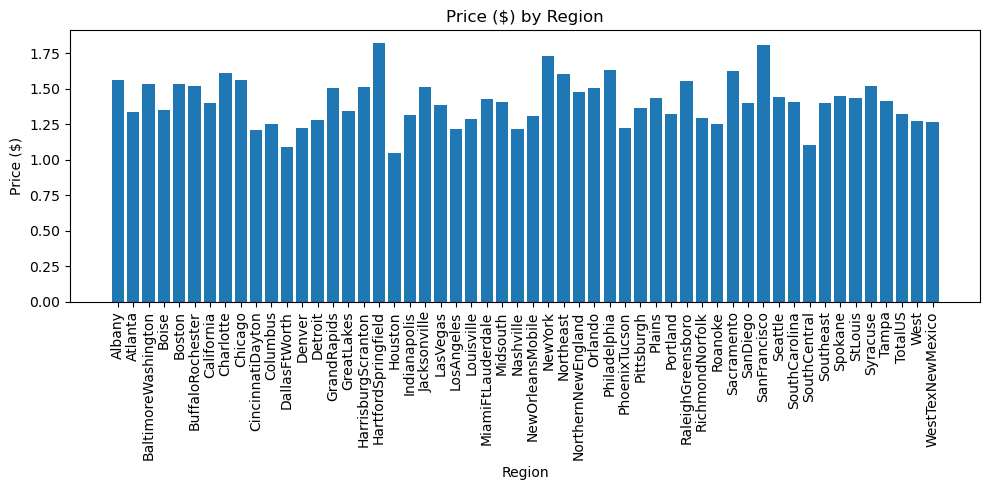

In [12]:
data1 = get_average_between_two_columns(df, 'region', 'AveragePrice')
plot(data1, 'Region', 'Price ($)')



In [13]:
data1_sorted = data1.sort_values(by='AveragePrice', ascending=False)


In [14]:
highest = data1_sorted.iloc[0]
lowest = data1_sorted.iloc[-1]

print(f"Highest price region: {highest['region']} (${highest['AveragePrice']:.2f})")
print(f"Lowest price region : {lowest['region']} (${lowest['AveragePrice']:.2f})")


Highest price region: HartfordSpringfield ($1.82)
Lowest price region : Houston ($1.05)


In [15]:
lowest = data1_sorted.iloc[-1]

print(
    lowest['region'],
    "is the region producing avocado with the lowest average price:",
    round(lowest['AveragePrice'], 2)
)


Houston is the region producing avocado with the lowest average price: 1.05


# what region has the highest price of the avocado?

checking outlier

In [16]:
def get_average_between_two_columns(df, group_col, value_col):
    return (
        df.groupby(group_col)[value_col]
          .mean()
          .reset_index()
    )


In [17]:
data2 = get_average_between_two_columns(df, 'region', 'Total Volume')


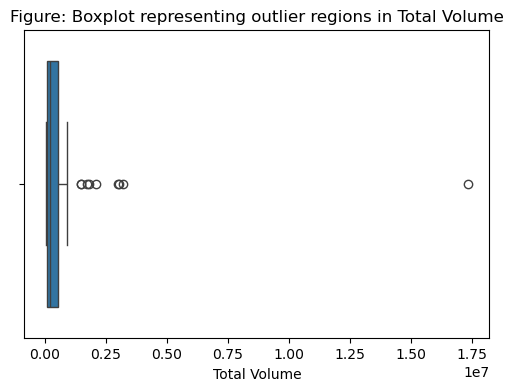

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=data2['Total Volume'])
plt.title("Figure: Boxplot representing outlier regions in Total Volume")
plt.show()


In [19]:
outlier_region = data2[data2['Total Volume']>10_000_000]




In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [21]:
outlier_region = data2[data2['Total Volume'] > 10_000_000]





In [22]:
outlier_region[['region', 'Total Volume']]


,region,Total Volume
51,TotalUS,1.735130e+07


# REMOVE OUTLIER

In [23]:
# Remove outlier regions safely
data2_clean = data2[data2['Total Volume'] >10_000_000]


In [24]:
data2 = data2.reset_index(drop=True)
outlier_region = outlier_region.reset_index(drop=True)

data2 = data2.drop(outlier_region.index)


In [25]:
data2_sorted = data2.sort_values(by='Total Volume', ascending=False)


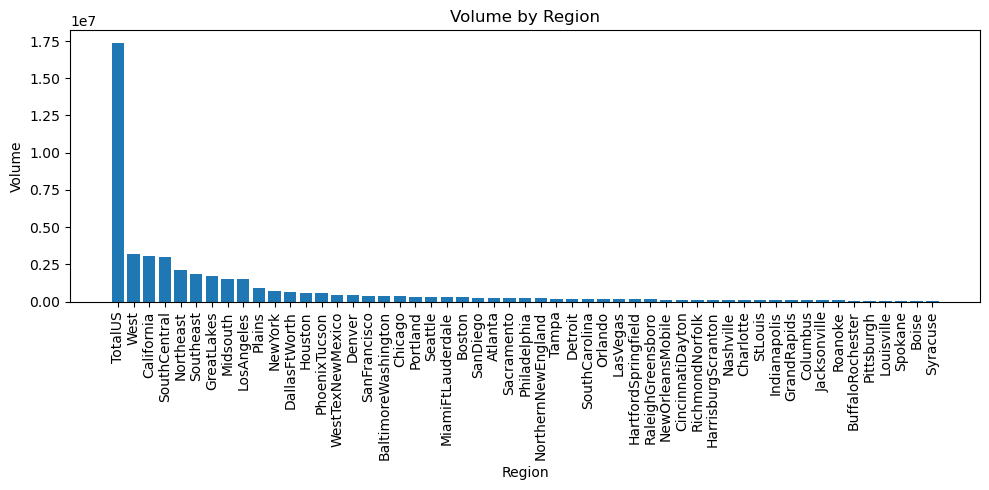

In [26]:
plot(data2_sorted,'Region','Volume')

In [27]:
X = df.drop(['AveragePrice'], axis=1)
y = df['AveragePrice']

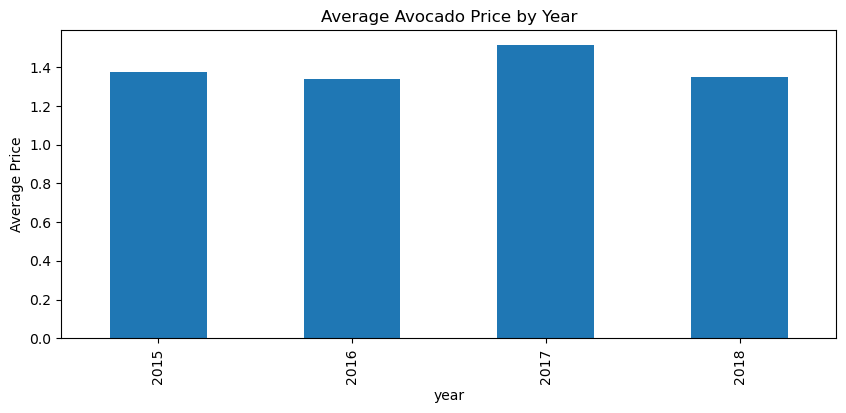

In [28]:
plt.figure(figsize=(10,4))
df.groupby('year')['AveragePrice'].mean().plot(kind='bar')
plt.ylabel("Average Price")
plt.title("Average Avocado Price by Year")
plt.show()


# what is the average price in each year?

In [29]:
data3 = get_average_between_two_columns(df, 'year', 'AveragePrice')


In [30]:
def get_average_between_two_columns(df, group_col, value_col):
    return (
        df.groupby(group_col)[value_col]
          .mean()
          .reset_index()
    )


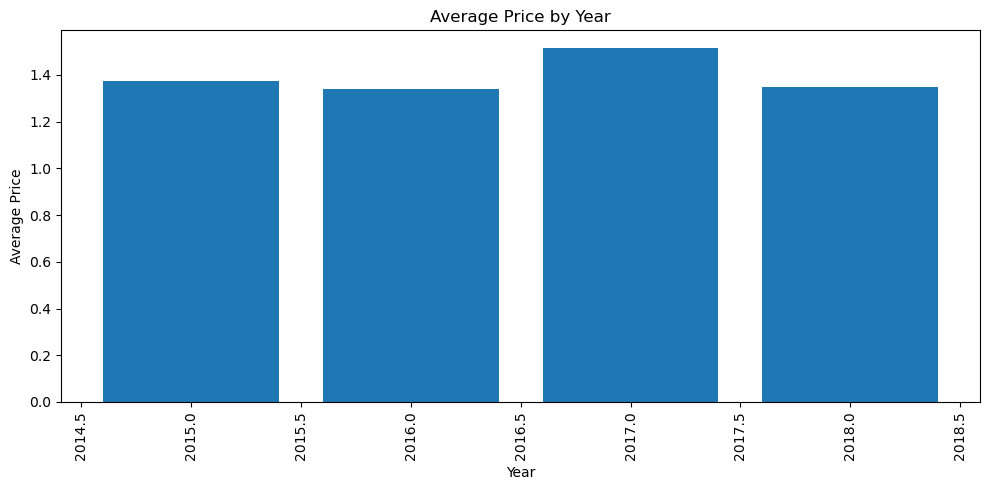

In [31]:
plot(data3, 'Year', 'Average Price')


In [32]:
data4 = get_average_between_two_columns(df, 'year', 'Total Volume')



In [33]:
data4 = data4.sort_values(by='year')



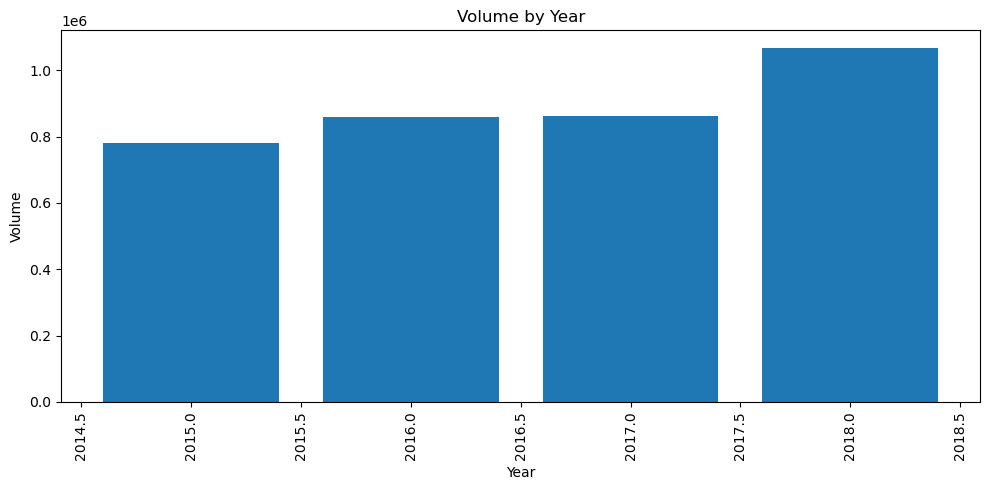

In [34]:
plot(data4,'Year','Volume')

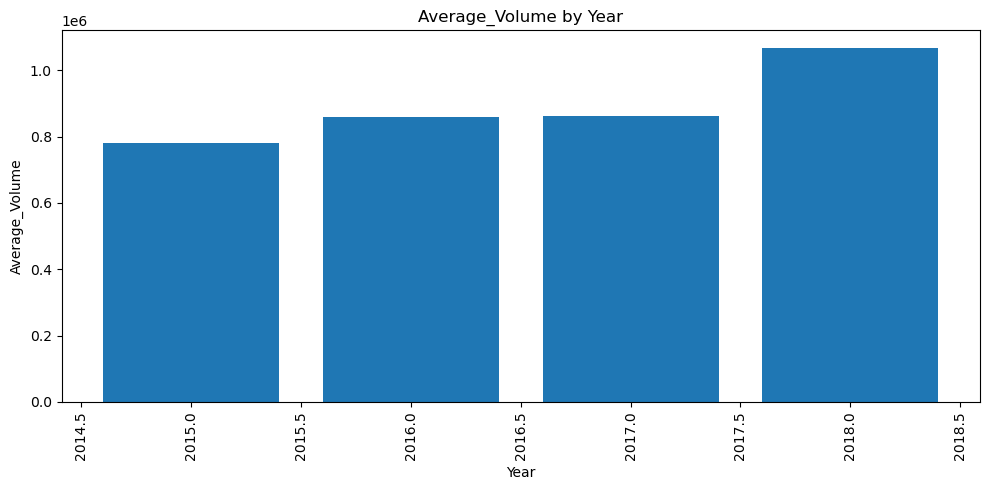

In [35]:
data4 = get_average_between_two_columns(df, 'year', 'Total Volume')
data4 = data4.sort_values('year')   # optional but recommended
plot(data4, 'Year', 'Average_Volume')


# data modeling

changing some column types to categories

In [36]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int8   
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int8   
dtypes: float64(9), int64(2), int8(2), object(1)
memory usage: 1.7+ MB


In [38]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [39]:
# split data into X and y
X = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

# split data into traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=15)

In [40]:
print("training set:",X_train.shape,' - ',y_train.shape[0],' samples')
print("testing set:",X_test.shape,' - ',y_test.shape[0],' samples')

training set: (12774, 13)  -  12774  samples
testing set: (5475, 13)  -  5475  samples


In [41]:
print(X_train.dtypes)
print(X_train.isnull().sum().sum())
print(X_train.shape, y_train.shape)






Unnamed: 0        int64
Date             object
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type               int8
year              int64
region             int8
dtype: object
0
(12774, 13) (12774,)


In [42]:
X_train = X_train.drop(columns=['Unnamed: 0'], errors='ignore')
X_test  = X_test.drop(columns=['Unnamed: 0'], errors='ignore')


In [43]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [44]:
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].mean())
X_test[num_cols]  = X_test[num_cols].fillna(X_test[num_cols].mean())

In [45]:
X['Date'] = pd.to_datetime(X['Date'])

X['year']  = X['Date'].dt.year
X['month'] = X['Date'].dt.month

X.drop('Date', axis=1, inplace=True)


In [46]:
if 'type' in X.columns and 'region' in X.columns:
    X = pd.get_dummies(X, columns=['type', 'region'], drop_first=True)


## evaluate the results

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# prediction and calculate the accuracy for the testing dataset
y_pred = model.predict(X_test)
train_score = r2_score(y_test,y_pred)
print("The accuracy of training dataset ",train_score*100)

The accuracy of training dataset  59.18477599391323


In [49]:
import pickle
with open('avocado_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [50]:
pwd


'c:\\Users\\pavan\\Desktop\\FSDS\\PROJECTS\\avocado-eda-dashboard-main'